# Business Understanding  

## Background Information  

SyriaTel is a telecommunications company that faces customer churn.   
The business wants to:  
* Predict which customers are most likely to stop doing business with SyriaTel.  
* Understand the key factors driving customer churn.  
* Take action to retain at-risk customers through targetd interventions such as promotions, improved customer support or loyalty programs.   

## Problem Statement 

Customer churn reduces revenue, increases acquistion costs, loss of market share to competitors and damaged brand reputation. High churn rates indicate potential issues with customer satisfication, network quality or pricing strategies. This project aims to predict customer churn using a binary classification model. 
 * Churn = 1 (customer leaves)
 * Churn = 0 (customer stays) 
  
## Objectives 
* Develop a predictive model to flag customers at high risk of churn.
* Generate interpretable insights into why customers leave.  
* Provide actionable recommndations for retention strategies. 
  
## Metrics of Success 
1. Recall(Sensitivity): Ability to correctly identify churners.
2. Precision: Proportion of predicted churners who actually churn. 
3. FI Score: Balance between precision and recall.
4. ROC-AUC Score: Overall model ability to distinguish churners from non-churners.


# Data Understanding 

## Initial Data Exploration(IDE) 

In [1]:
#import libraries
#data manipulation libraries
import pandas as pd 
import numpy as np

#visualization libraries
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

#preprocessing and scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#model selection and hyperparameter tuning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

#handling imbalanced data
from imblearn.over_sampling import SMOTE, SMOTEN

#random distributions for hyperparameter tuning
from scipy.stats import randint

#model evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

#machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#suppress warnings
import warnings 
warnings.filterwarnings("ignore") 

In [2]:
#load dataset
st_df = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
#check head
st_df.head() 

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#display shape
print(f"The dataset has {st_df.shape[0]} rows and {st_df.shape[1]} columns.")

The dataset has 3333 rows and 21 columns.


In [4]:
#info
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Observation: The dataset comprises 16 numerical and 5 categorical columns.

### Column Explanations

1. **state**

* U.S. state where the customer resides.

2. **account length**

* Number of days the customer has had an account.

3. **area code**

* Area code of the customer’s phone number.


4. **international plan**

 * Whether the customer subscribes to an international calling plan(yes/no).


5. **voice mail plan**

* Whether the customer subscribes to a voice mail plan(yes/no).


6. **number vmail messages** 

 * Number of voice mail messages.

7. **total day minutes**

 * Total number of minutes customer used the phone during the day.

8. **total day calls** 

* Total number of calls during the day. 

9. **total day charge**

* Total amount charged for daytime calls. 

10. **total eve minutes**

* Total evening call minutes.

11. **total eve calls**

* Total number of evening calls.

12. **total eve charge**

* Total amount charged for evening calls.

13. **total night minutes**

* Total night call minutes.

14. **total night calls**

* Total number of night calls.

15. **total night charge** 

* Total amount charged for night calls.

16. **total intl minutes**

* Total international call minutes.

17. **total intl calls**

* Total number of international calls.

18. **total intl charge** 

* Total amount charged for international calls.

19. **customer service calls**

* Number of calls made to customer service.

20. **churn**

* Target variable: whether the customer stopped doing business with SyriaTel.
  
* True = churned, False = stayed.


In [5]:
#statistical summary of numerical columns
st_df.describe().T

,count,mean,std,min,25%,50%,75%,max
account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


**Observation**:  

***Customer Service Calls*** 
Most customers call once or not at all while a few call 6–9 times  likely due to dissatisfaction. 

***Account Length***  
Wide spread. This indicates both brand new and long-term customers.
Churn rate may differ between new vs long-term customers. 

***Voicemail Messages***  
Most customers have zero voicemail messages.

***Usage Patterns***  
Customers spend more minutes in the evening but highest charges in the day because day rates are higher.
Call counts are similar  across day/eve/night but charges vary. 

***International Usage***  
Most customers make few international calls, a small group makes many.


In [6]:
#statistical summary for categorical columns 
st_df.describe(include='O').T

,count,unique,top,freq
state,3333,51,WV,106
phone number,3333,3333,382-4657,1
international plan,3333,2,no,3010
voice mail plan,3333,2,no,2411


**Observation**:  

***State*** 
51 unique states, WV (West Virginia) has the highest with 106 customers.

***Phone Number***  
3333 unique values (one per customer).
An identifier, not a feature.

***International Plan***  
Most customers don’t have an international plan.

***Voice Mail Plan***  

Most customers don’t have a voice mail plan.


In [7]:
#check nulls 
st_df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [8]:
#check duplicates 
st_df.duplicated().sum()

0

In [9]:
#churned vs. non-churned customers proportion
st_df['churn'].value_counts(ascending=False, normalize=True) 

churn
False    0.855086
True     0.144914
Name: proportion, dtype: float64

**Observation**:  
The dataset is highly imbalanced: 85.5% did not churn and only 14.5% churned. 

In [10]:
#correlation check
st_df.corr(numeric_only=True)

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
area code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572,0.006174
number vmail messages,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493


**Observation**:  

***Customer Service Calls*** has the highest positive correlation with churn.     

***Total Day Minutes and Total Day Charge*** have a moderate positive correlation with churn.    

***Total International Minutes and Total Intl Charge** have a smaller positive correlation with churn.  

***Number of Voicemail Messages*** has a negative correlation with churn.    

***Minutes and Charges for each period (day/eve/night/intl)*** are perfectly correlated.


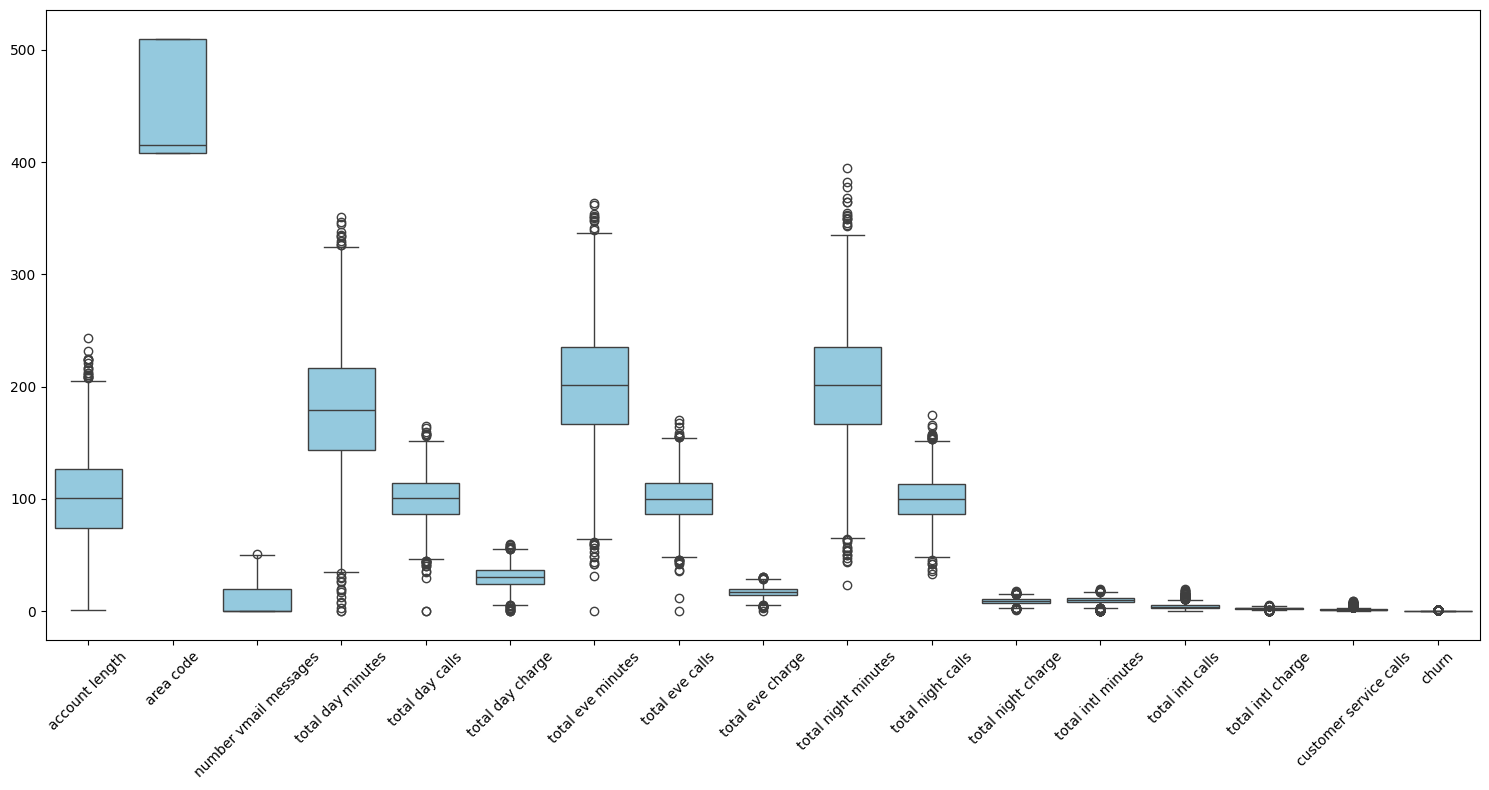

In [11]:
#check for outliers
plt.figure(figsize=(15,8))
sns.boxplot(data=st_df, color="skyblue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show();


**Observation**:  
The data shows that several features (especially usage metrics like total day/eve/night minutes, international minutes/calls, and customer service calls) have clear high-end outliers representing heavy or atypical customer behavior. Most customers have low voicemail usage and few customer-service calls, but a small group has extremely high values. Area code behaves categorically and not numerically. These outliers likely indicate distinct customer segments rather than errors and could be strong signals for churn prediction.  


## Data Preparation

### Data Cleaning

In [12]:
#make a copy 
st_df1 = st_df.copy(deep=True)

In [13]:
#remove phone number column
st_df1 = st_df1.drop(columns=["phone number"])

In [14]:
#convert area code to categorical
st_df1['area code'] = st_df1['area code'].astype('object')

## Exploratory Data Analysis  
This section involves exploring to understanding the dataset's structure to uncover patterns, identify relationships between features and target before applying any modeling techniques. 


### Univariate Analysis  
This involves exploring each feature individually to understand the distribution and skewness.

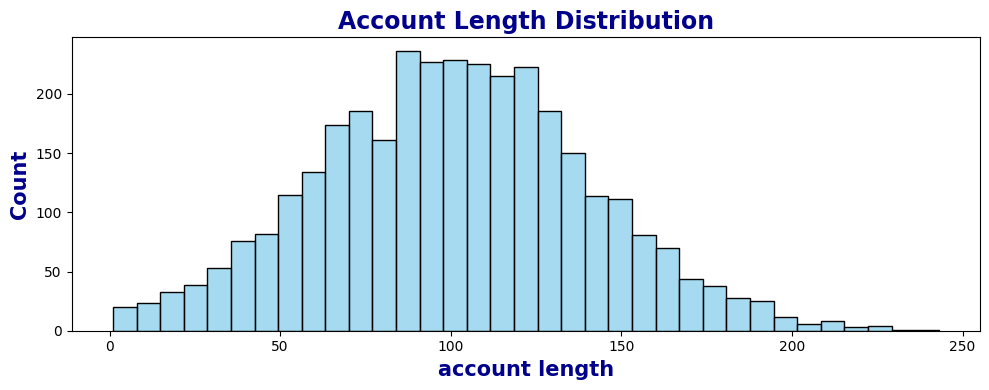

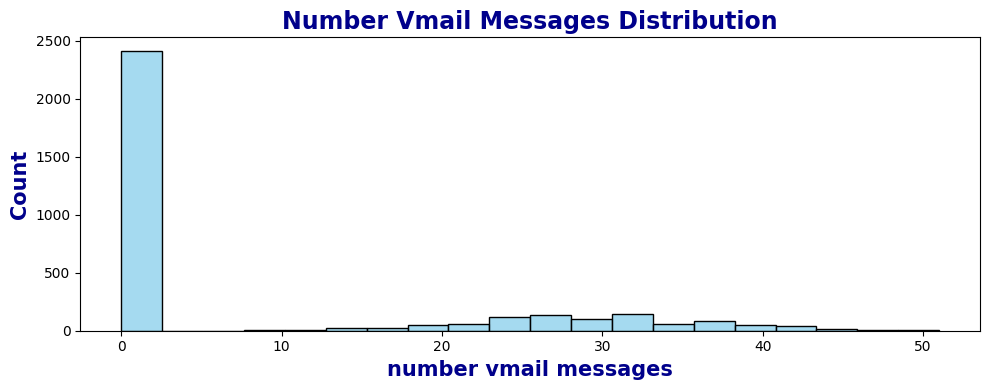

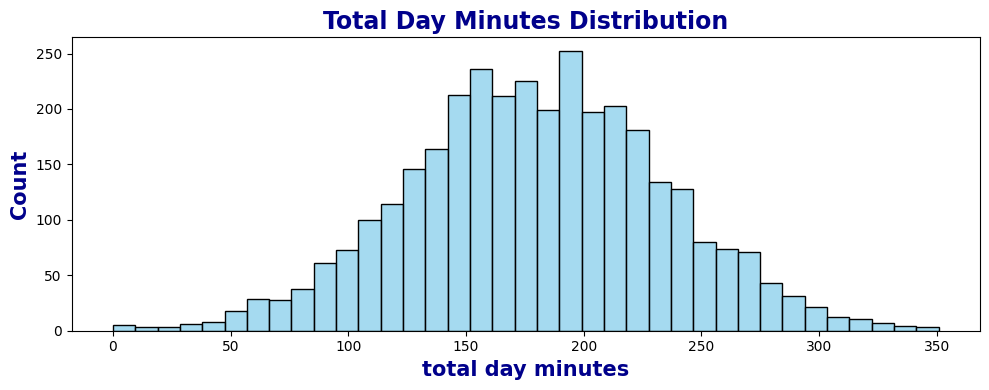

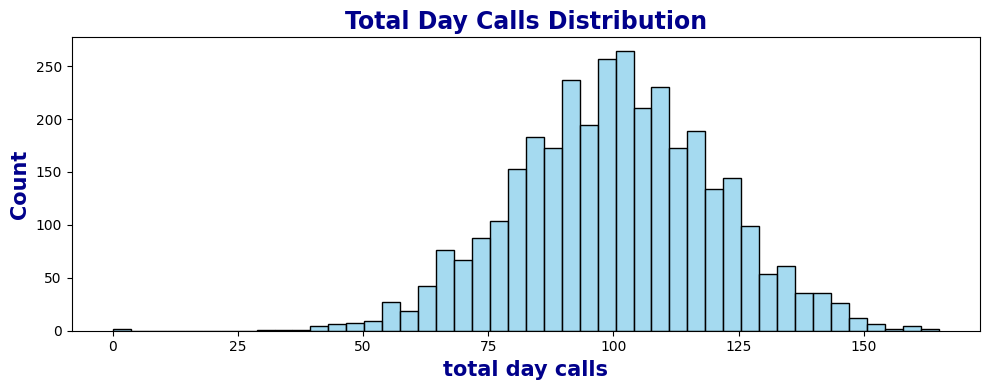

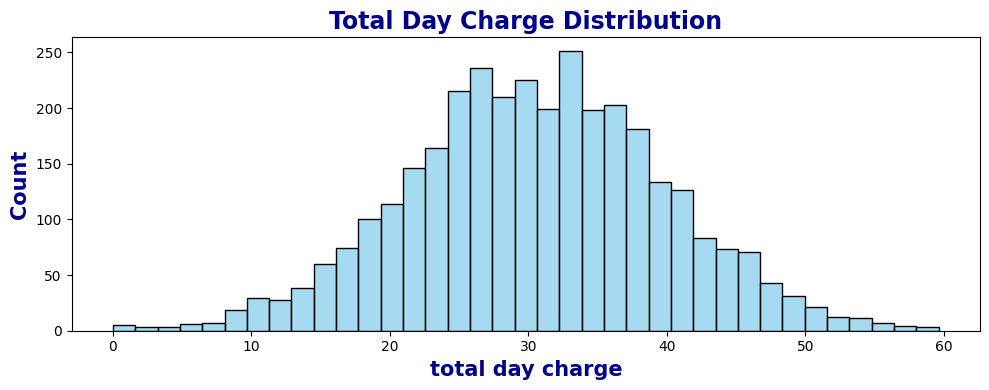

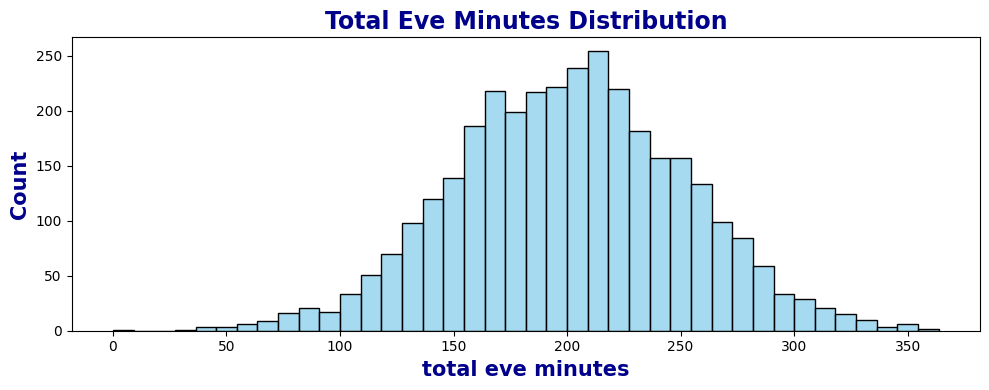

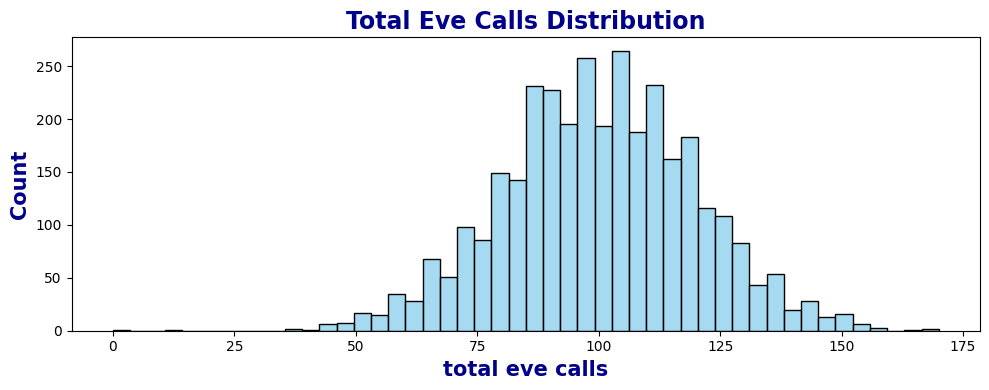

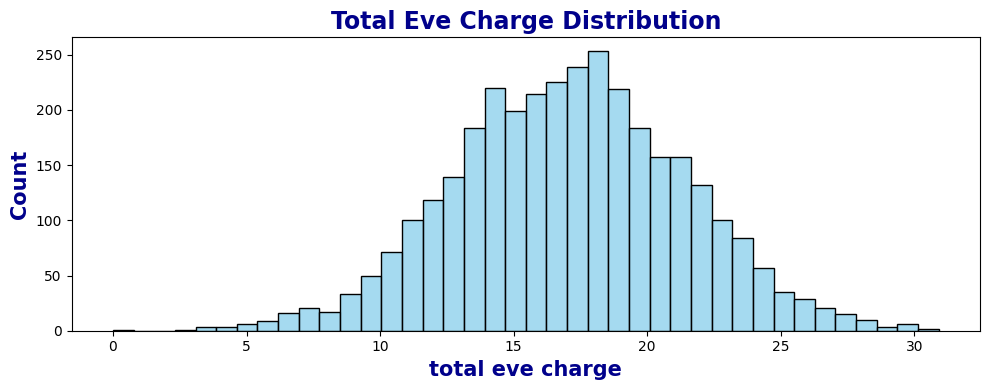

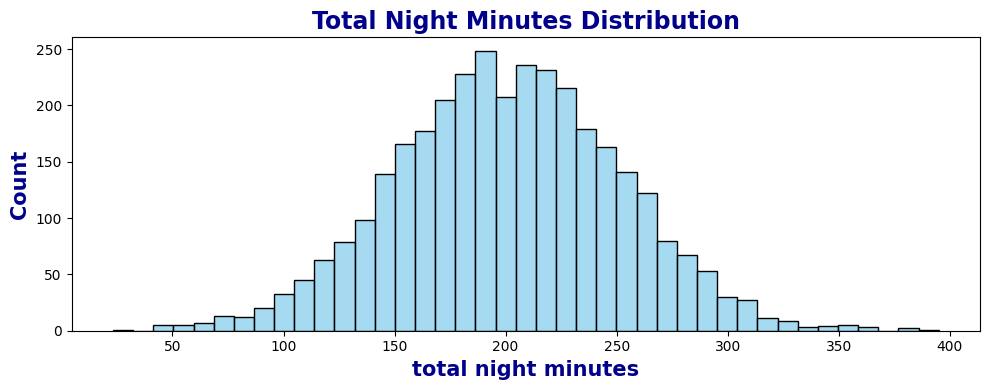

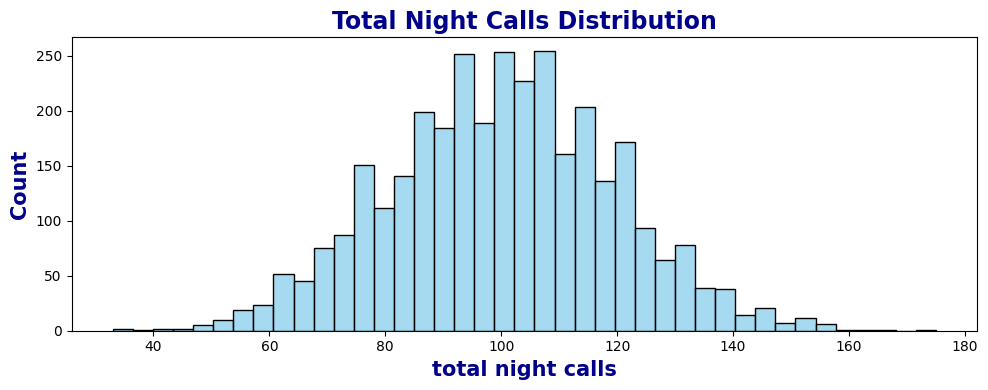

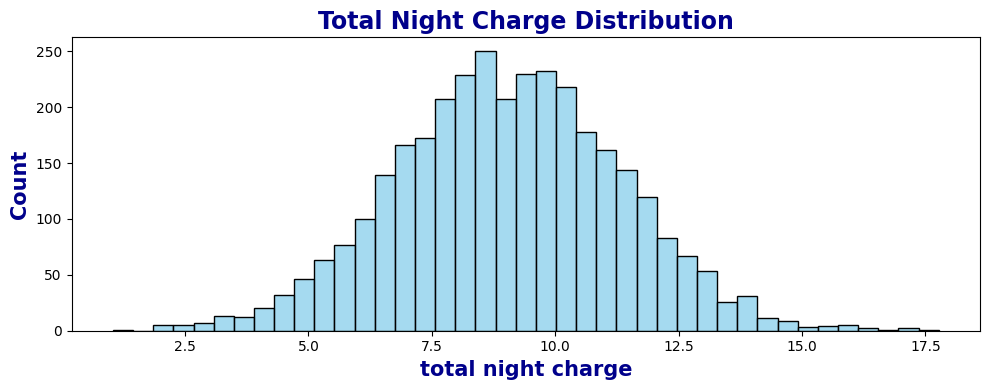

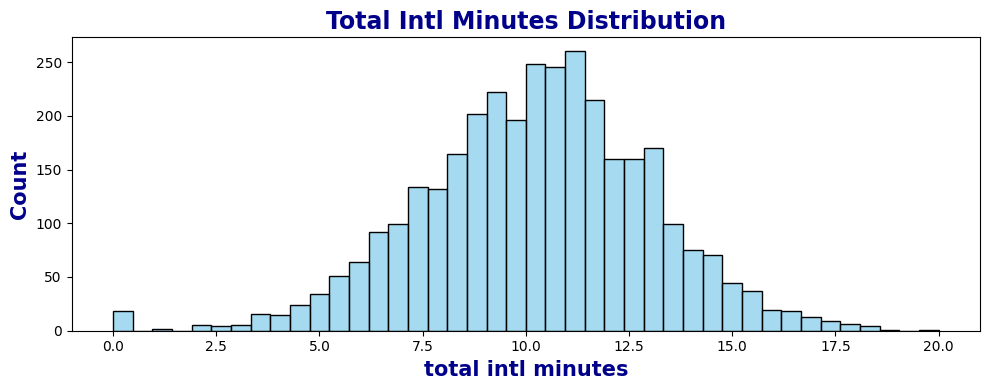

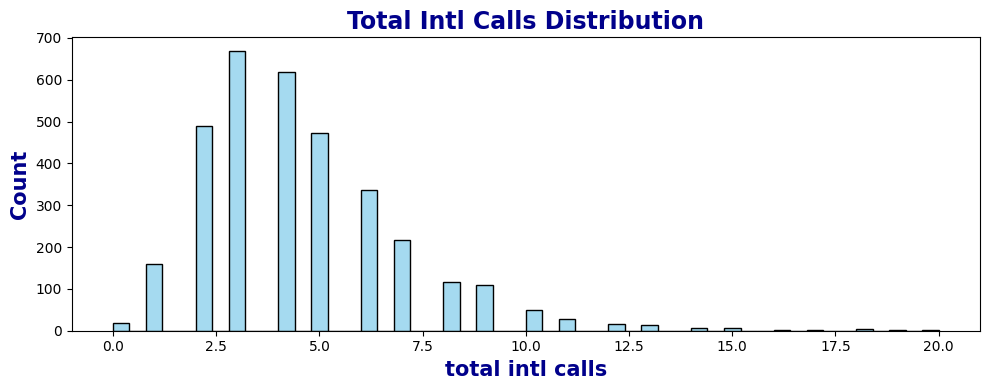

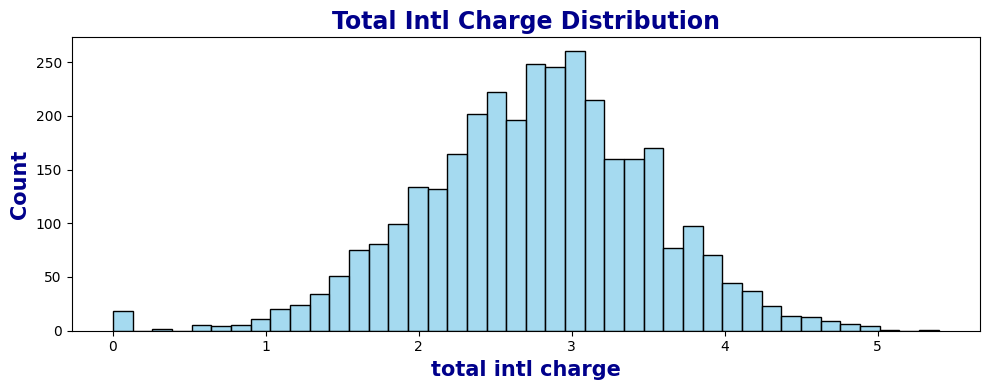

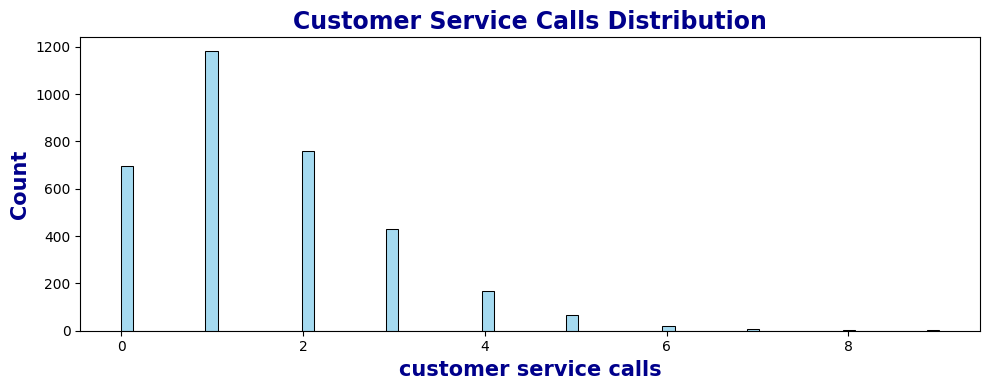

In [15]:
#select only numeric columns
num_coln = st_df1.select_dtypes("number")

#loop through each numeric column and plot the distribution
for col in num_coln:
    plt.figure(figsize=(10,4))
    sns.histplot(st_df1[col], bins='auto', color='skyblue', edgecolor='black')
    plt.xlabel(col, fontsize=15, color='darkblue', fontweight='bold')
    plt.ylabel("Count", fontsize=15, color='darkblue', fontweight='bold')
    plt.title(f"{col.title()} Distribution",fontsize=17,color='darkblue',fontweight='bold')
    plt.tight_layout()
    plt.show();

**Observation**:    
All of the plots except customer service calls and number of voicemail messages have a normal distribution. 

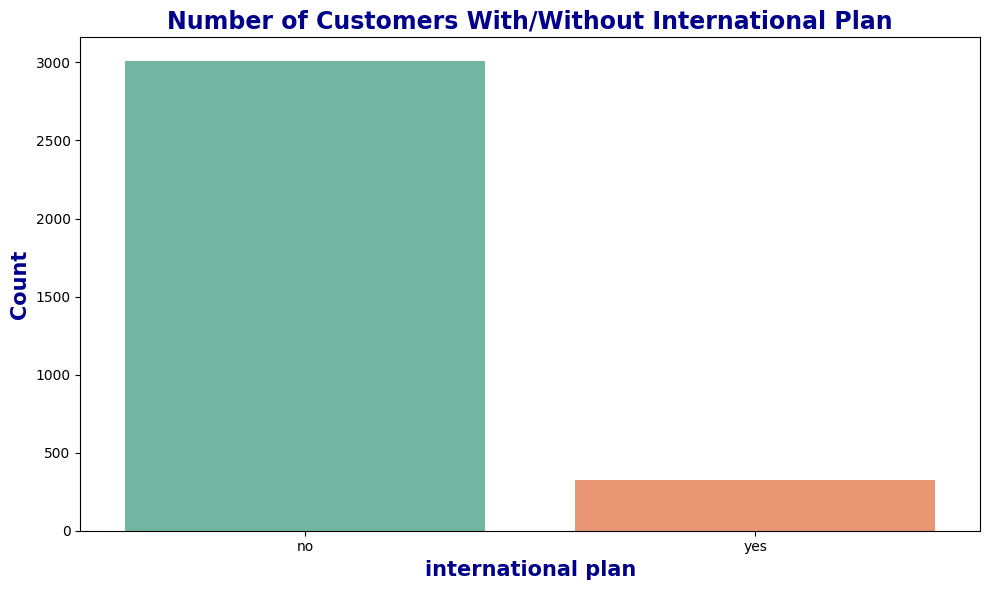

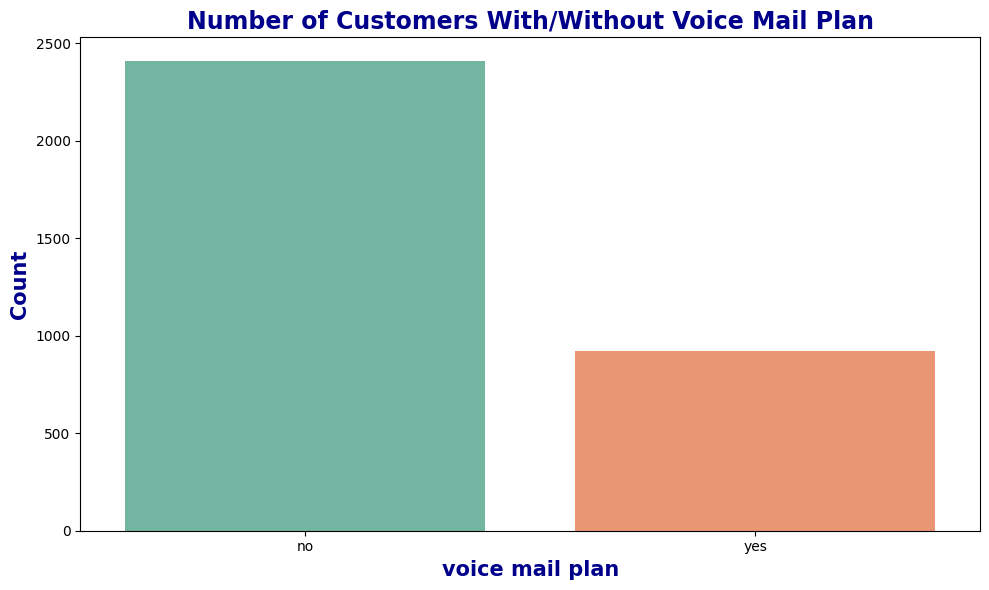

In [16]:
#categorical columns
cat_coln = st_df1[["international plan", "voice mail plan"]]

#titles for each column
title_map = {"international plan": "Number of Customers With/Without International Plan",
            "voice mail plan": "Number of Customers With/Without Voice Mail Plan",}

#loop through the specified categorical columns and plot the distribution
for col in cat_coln:
    #sort categories by their frequency in descending order
    sorted_cat = st_df1[col].value_counts(ascending=False).index

    plt.figure(figsize=(10,6))
    sns.countplot(data=st_df1, x=col, palette='Set2', order=sorted_cat)
    plt.xlabel(col, fontsize=15, color='darkblue', fontweight='bold')
    plt.ylabel("Count", fontsize=15, color="darkblue", fontweight='bold')
    plt.title(title_map[col], fontsize=17, color='darkblue', fontweight='bold')
    plt.tight_layout()
    plt.show();

**Observation**:  
Most customers have no interntional and voice mail plan.

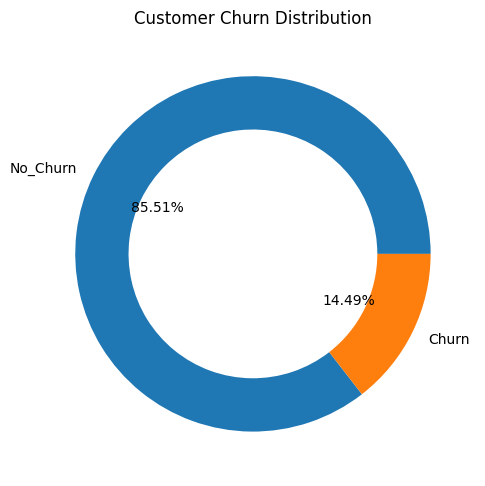

In [17]:
churned_count = st_df1.churn.value_counts(ascending=False)

labels = ["No_Churn", "Churn"]

#plot pie chart
plt.figure(figsize=(5,5))
plt.pie(churned_count, labels=labels, autopct="%.2f%%", colors=['#1f77b4','#ff7f0e'], wedgeprops=dict(width=0.3))
plt.title("Customer Churn Distribution")
plt.tight_layout()
plt.show();

Observation: There are more customers who stayed than the ones who churned, there is a class imbalance. 

In [18]:
#grouping states by region
region_map = {
    # Northeast states
    'ME':'Northeast','NH':'Northeast','VT':'Northeast','MA':'Northeast','RI':'Northeast',
    'CT':'Northeast','NY':'Northeast','NJ':'Northeast','PA':'Northeast',

    # Midwest states
    'OH':'Midwest','MI':'Midwest','IN':'Midwest','IL':'Midwest','WI':'Midwest',
    'MN':'Midwest','IA':'Midwest','MO':'Midwest','ND':'Midwest','SD':'Midwest',
    'NE':'Midwest','KS':'Midwest',

    # Southern states
    'DE':'South','MD':'South','DC':'South','VA':'South','WV':'South',
    'NC':'South','SC':'South','GA':'South','FL':'South',
    'KY':'South','TN':'South','MS':'South','AL':'South',
    'OK':'South','TX':'South','AR':'South','LA':'South',

    # Western states
    'ID':'West','MT':'West','WY':'West','NV':'West','UT':'West','CO':'West',
    'AZ':'West','NM':'West','AK':'West','WA':'West','OR':'West','CA':'West','HI':'West'
}
#apply mapping to a new region column
st_df1['region'] =st_df1['state'].map(region_map)
#verify the region column
print(st_df1['region'].value_counts())


region
South        1109
West          831
Midwest       802
Northeast     591
Name: count, dtype: int64


In [19]:
# # #feature engineering
# st_df1["total_day_minutes"] = pd.qcut(st_df1["total_day_minutes"], 10 )
# st_df1["total_eve_minutes"] = pd.qcut(st_df1["total_eve_minutes"], 10)
# st_df1["total_night_minutes"] = pd.qcut(st_df1["total_night_minutes"], 10 )
# st_df1["total_intl_minutes"] = pd.qcut(st_df1["total_intl_minutes"], 10)
# st_df1["customer_service_calls"] = pd.qcut(st_df1["customer_service_calls"], 10, duplicates="drop")
# st_df1["number_vmail_messages"] = pd.qcut(st_df1["number_vmail_messages"], 10, duplicates="drop" )




In [20]:
#drop the state column
st_df1 = st_df1.drop("state", axis=1)

#verifying
st_df1.columns

Index(['account length', 'area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn', 'region'],
      dtype='object')

### Bivariate Analysis  
We examine the relationships between two variables at a time, a predictor variable and the target variable.  

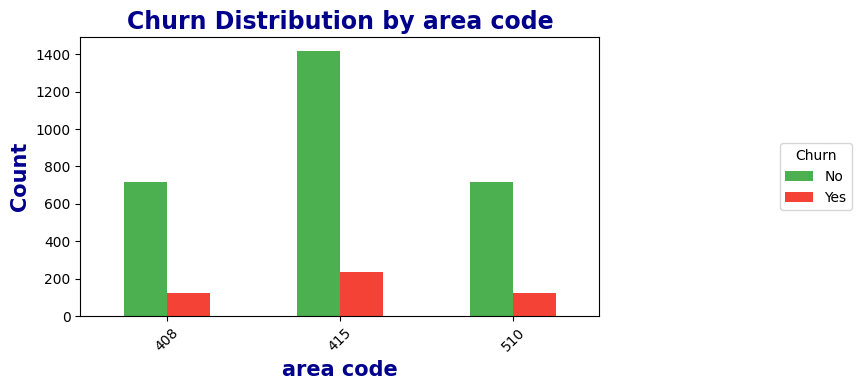

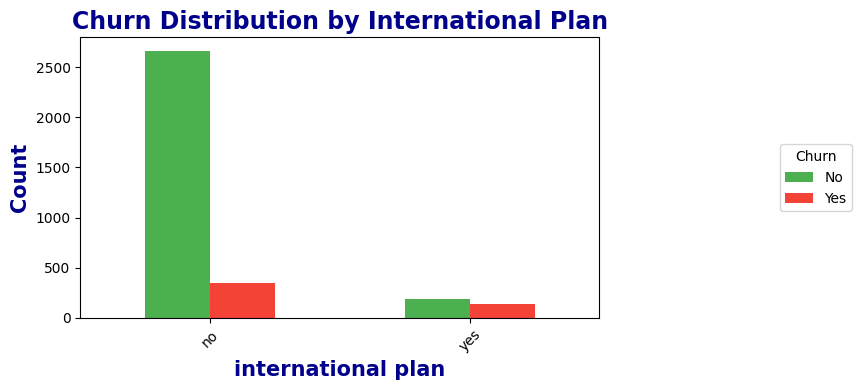

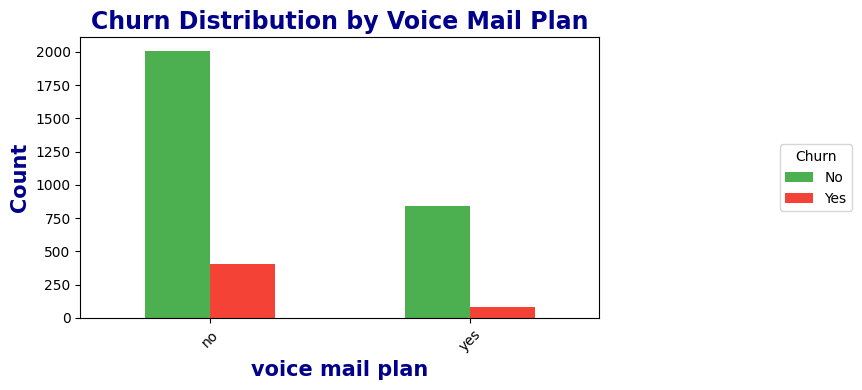

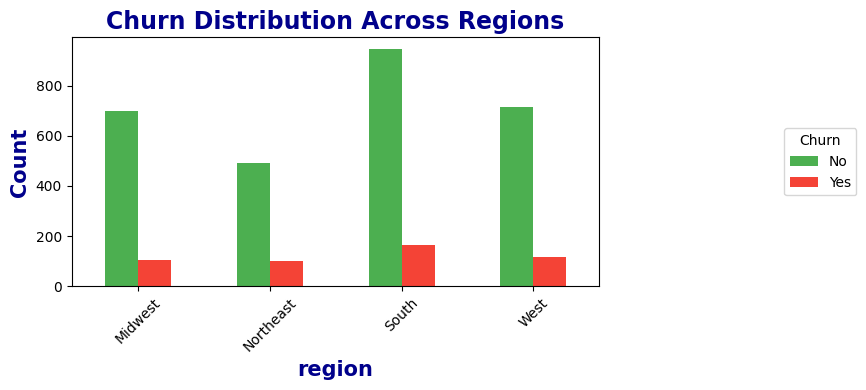

In [21]:
cat_coln = st_df1.select_dtypes("object")

title_map = {"international plan": "Churn Distribution by International Plan",
             "voice mail plan": "Churn Distribution by Voice Mail Plan",
             "region": "Churn Distribution Across Regions",
             "area code": "Churn Distribution by area code"}
             
colors = ["#4CAF50", "#F44336"] 
for col in cat_coln:
    ct = pd.crosstab(st_df1[col], st_df1["churn"])
    ax = ct.plot(kind='bar', figsize=(10,4), color= colors)
    plt.xlabel(col, fontsize=15, color='darkblue', fontweight='bold')
    plt.ylabel("Count", fontsize=15, color="darkblue", fontweight='bold')
    title = title_map.get(col, st_df1["churn"])
    plt.title(title, fontsize=17, color='darkblue', fontweight='bold')
    plt.legend(title="Churn", loc="center right", bbox_to_anchor=[1,0,0.5,1], labels=["No", "Yes"])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show();

**Observation**:  
Majority of customers who churned are from the South, those with no internatioanal plan and no voice mail plan. 

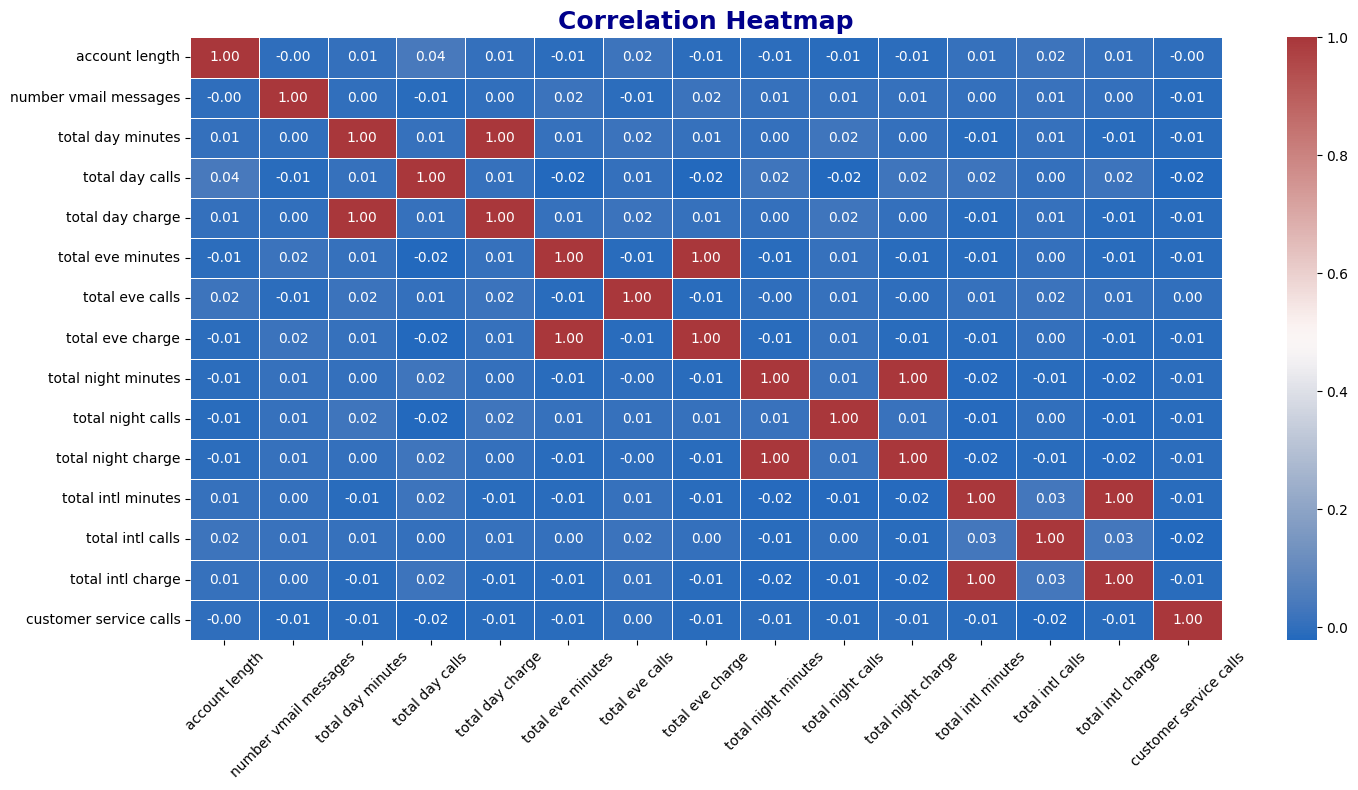

In [22]:
#Plot heatmap
corr = st_df1.select_dtypes("number").corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=18, fontweight='bold', color='darkblue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show(); 

**Observation**:  
Most of the features are not correlated though some have a perfect correlation.  
This indicates multicollinearity.    
Features with a perfect correlation:   
* Total day charge and total day minutes.    
* Total eve charge and total eve minutes.
* Total night charge and total night minutes.  
* Total int charge and total int minutes.  

## Handling Multicollinearity  
We drop perfectly correlated features.  


In [23]:
#drop highly correlaed columns
col_to_drop = ["total day charge", "total eve charge", "total night charge", "total intl charge"]
st_df1.drop(col_to_drop, axis=1, inplace=True)
st_df1.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,region
0,128,415,no,yes,25,265.1,110,197.4,99,244.7,91,10.0,3,1,False,Midwest
1,107,415,no,yes,26,161.6,123,195.5,103,254.4,103,13.7,3,1,False,Midwest
2,137,415,no,no,0,243.4,114,121.2,110,162.6,104,12.2,5,0,False,Northeast
3,84,408,yes,no,0,299.4,71,61.9,88,196.9,89,6.6,7,2,False,Midwest
4,75,415,yes,no,0,166.7,113,148.3,122,186.9,121,10.1,3,3,False,South


### Multivariate Analysis 

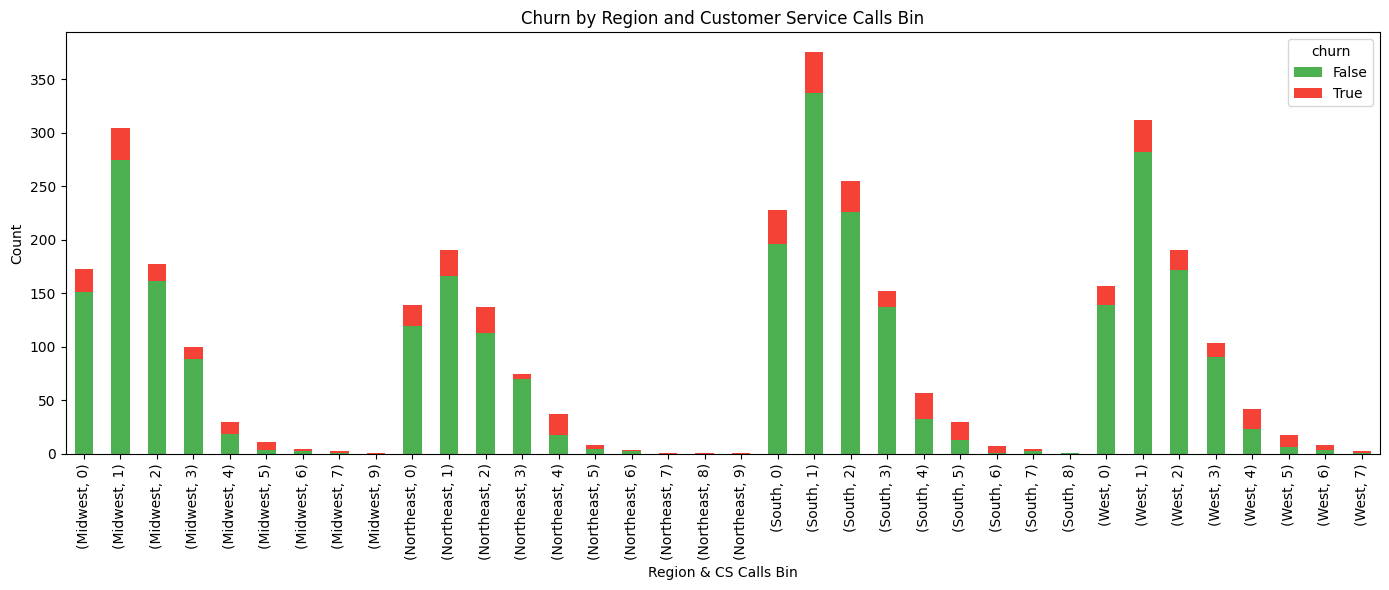

In [24]:
cross_tab = pd.crosstab([st_df1["region"], st_df1["customer service calls"]], st_df1["churn"])
cross_tab.plot(kind="bar", stacked=True, figsize=(14,6),
               color=["#4CAF50", "#F44336"])
plt.title("Churn by Region and Customer Service Calls Bin")
plt.xlabel("Region & CS Calls Bin")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


## Feature Engineering  
This involves label encoding, One Hot Encoding and Scaling. 

### Label Encoding  
It involves converting binary categorical variables(Yes/No) to numeric (1/0).

In [25]:
#label encode  international plan, voice mail plan and churn
le = LabelEncoder()
st_df1["churn"] = le.fit_transform(st_df1["churn"])


### One Hot Encoding  
A technique that transforms categorical variables with more than two categories into multiple binary features by creating a separate column for each category and assigning a value of 1 when the category is present and 0 when it is absent.

In [26]:
#columns to one hot encode
cols_to_ohe = ["region","area code", 'international plan', "voice mail plan"]

#one hot encoding
ohe_cols = pd.get_dummies(st_df1[cols_to_ohe], drop_first=True, dtype="int")

#merge encoded values with the original dataset
merged_df = pd.concat([st_df1, ohe_cols], axis=1)

#drop the original categorical columns
merged_df.drop(columns=cols_to_ohe,  inplace=True)
merged_df.head()

,account length,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,churn,region_Northeast,region_South,region_West,area code_415,area code_510,international plan_yes,voice mail plan_yes
0,128,25,265.1,110,197.4,99,244.7,91,10.0,3,1,0,0,0,0,1,0,0,1
1,107,26,161.6,123,195.5,103,254.4,103,13.7,3,1,0,0,0,0,1,0,0,1
2,137,0,243.4,114,121.2,110,162.6,104,12.2,5,0,0,1,0,0,1,0,0,0
3,84,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,0,0,0,0,0,1,0
4,75,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,0,1,0,1,0,1,0


In [27]:
#separate labels from features
X = merged_df.drop("churn", axis=1)
y = merged_df["churn"]

In [28]:
#separate train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)


#check shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2666, 18), (667, 18), (2666,), (667,))

### Scaling  
Transforms numerical features by standardizing their ranges ensuring that no single feature dominates the model due to its scale.  


In [29]:
#scaling
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test) 

#check shape
X_train_s.shape, X_test_s.shape, y_train.shape, y_test.shape

((2666, 18), (667, 18), (2666,), (667,))

### Handling Class Imbalance  
Most customers did not churn while only a small proportion did.   This imbalance can bias models toward predicting the majority class leading to poor recall for churned customers.  
SMOTE is applied on the training data to handle class imbalance and it generataes synthetic samples of the minority class which helps balance the training data.   

In [30]:
#applying SMOTE on training set
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train_s, y_train)

#check shape
X_train_sm.shape, X_test_s.shape, y_train_sm.shape, y_test.shape


((4560, 18), (667, 18), (4560,), (667,))

# Modeling 

### Logistic Regression 

In [31]:
#instantiate logistic regression
lr = LogisticRegression(random_state=42)
#fit on the training data
lr.fit(X_train_sm, y_train_sm)

LogisticRegression(random_state=42)

In [32]:
#calculate accuracy on training data
print(f" The model score on training dataset is {lr.score(X_train_sm, y_train_sm)*100:.2f}%")

 The model score on training dataset is 78.42%


In [33]:
#generate predictions
y_pred = lr.predict(X_test_s)

#calculate accuracy on test data
print(f" The model  score on test data is {accuracy_score(y_test, y_pred)*100:.2f}%")

 The model  score on test data is 76.01%


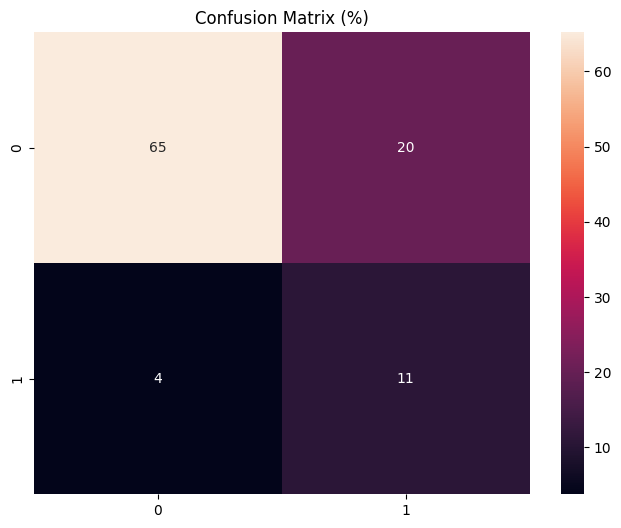

In [34]:
#compute confusion matrix
conf = confusion_matrix(y_test, y_pred)

#normalize to show percentages
conf_percent = conf / conf.sum()*100

#plot heatamap
plt.figure(figsize=(8,6))
sns.heatmap(conf_percent, annot=True, fmt=".0f")
plt.title("Confusion Matrix (%)")
plt.show();

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84       570
           1       0.35      0.74      0.47        97

    accuracy                           0.76       667
   macro avg       0.65      0.75      0.66       667
weighted avg       0.86      0.76      0.79       667



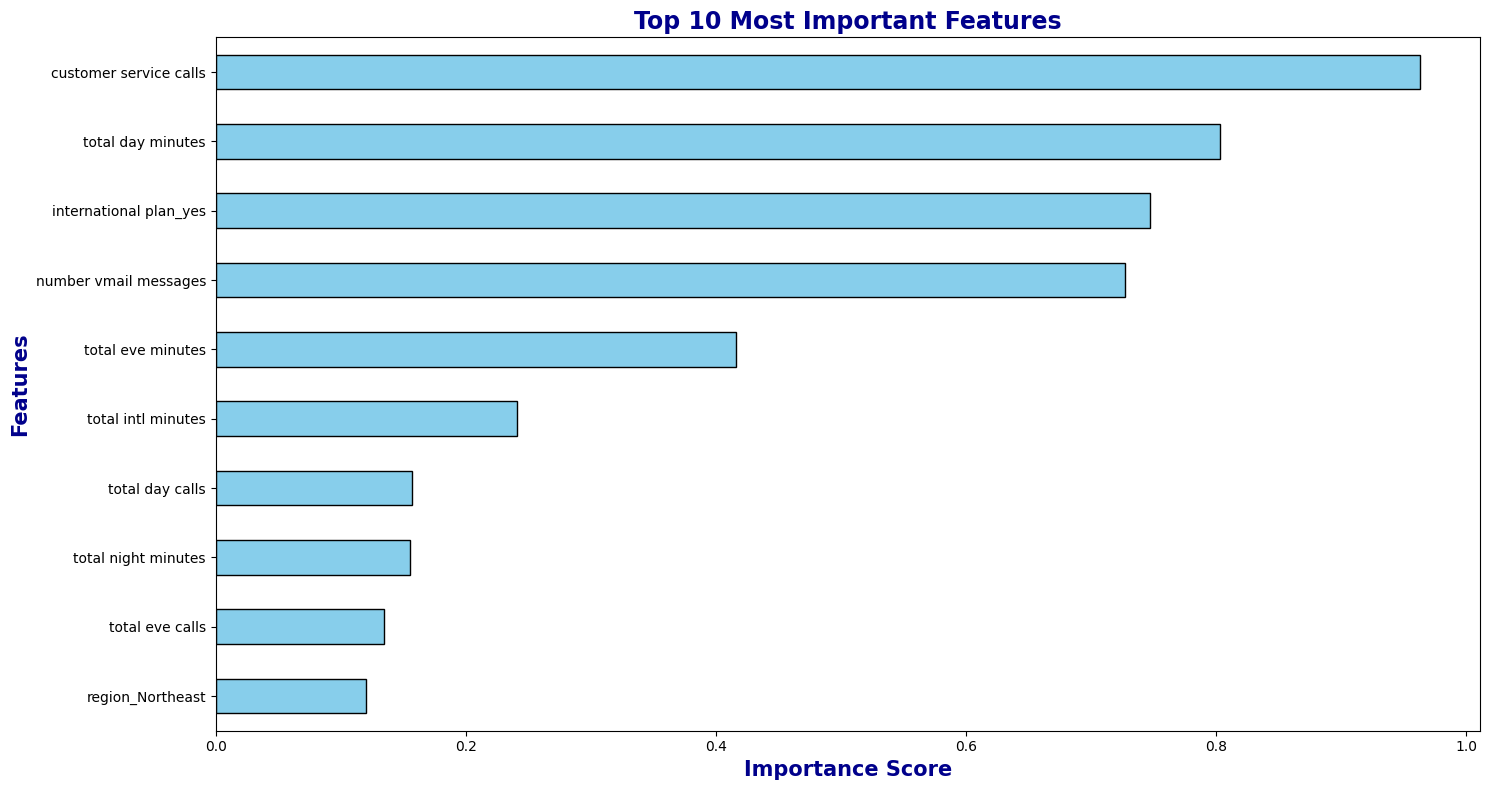

In [36]:
#recreate a dataFrame from X_train_sm with original feature names
X_train_sm_df = pd.DataFrame(X_train_sm, columns=X_train.columns)

#feature importance
importance = lr.coef_[0]

#match with the trained features
feature_names = X_train_sm_df.columns

#create a series for easy sorting and plotting
feature_importances = pd.Series(importance, index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)

#plot top 10 important features
plt.figure(figsize=(15,8))
top_features=feature_importances.head(10)
top_features.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Importance Score', fontsize=15, color='darkblue', fontweight='bold')
plt.ylabel('Features', fontsize=15, color='darkblue', fontweight='bold')
plt.title('Top 10 Most Important Features', fontsize=17, color='darkblue', fontweight='bold')
plt.tight_layout()
plt.show(); 


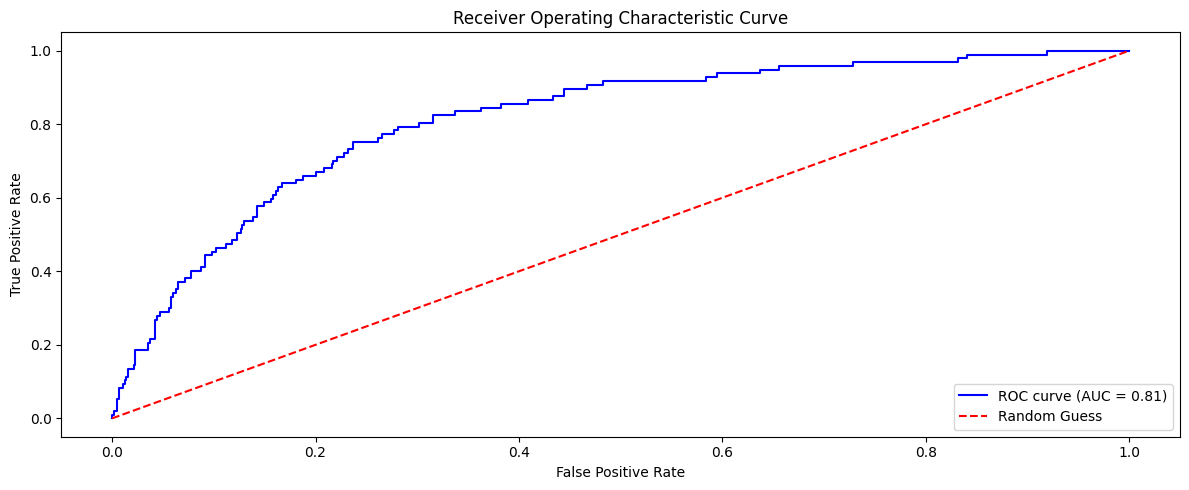

In [37]:
#predict probabilities for the positive class
y_pred_proba = lr.predict_proba(X_test_s)[:,1]

#compute ROC curve
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

#compute AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

#plot
plt.figure(figsize=(12,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--', label='Random Guess')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show();

**Observation**:  
The logistic regression model achieved a recall score of 0.74 for those who churn. The model correctly identifies about 74% of customers who actually churned.

The classification report shows an accuracy of 76% with a precision of 0.35 and an F1-score of 0.47 for those who  churn indicating that while the model captures most churners (high recall) it still predicts some non churners incorrectly as churners (lower precision).

The model produced more true positives (correctly predicted churners) and true negatives (correctly predicted non-churners) than false predictions. This suggests the model is making correct predictions more often than incorrect ones and does not appear to be severely overfitting.

Total Day Charge, Customer Service Calls and Total Evening Charge are the top three most influential predictors of churn.

### Decision Tree

In [38]:
#instantiate DecisionTreeClassifier
tree = DecisionTreeClassifier()
#fit on the training data
tree.fit(X_train_sm, y_train_sm) 


DecisionTreeClassifier()

In [40]:
#generate predictions
y_pred1 = tree.predict(X_test_s)

#calculate accuracy on test data
print(f" The model  score on test data is {accuracy_score(y_test, y_pred1)*100:.2f}%")

 The model  score on test data is 86.06%


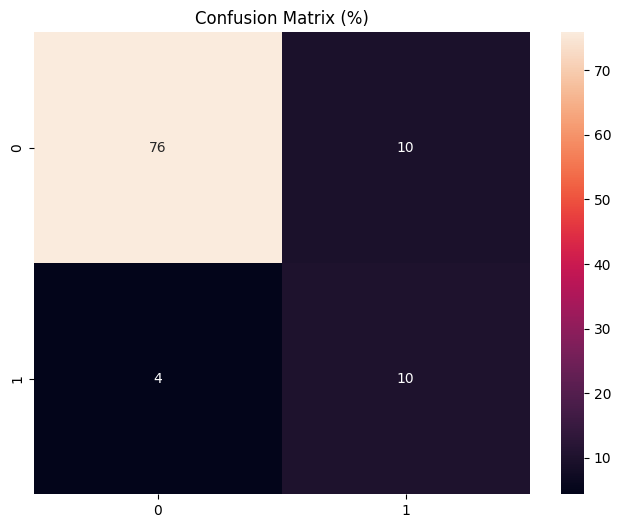

In [41]:
#compute confusion matrix
conf = confusion_matrix(y_test, y_pred1)

#normalize to show percentages
conf_percent = conf / conf.sum()*100

#plot heatamap
plt.figure(figsize=(8,6))
sns.heatmap(conf_percent, annot=True, fmt=".0f")
plt.title("Confusion Matrix (%)")
plt.show();

In [42]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       570
           1       0.52      0.70      0.59        97

    accuracy                           0.86       667
   macro avg       0.73      0.79      0.75       667
weighted avg       0.88      0.86      0.87       667



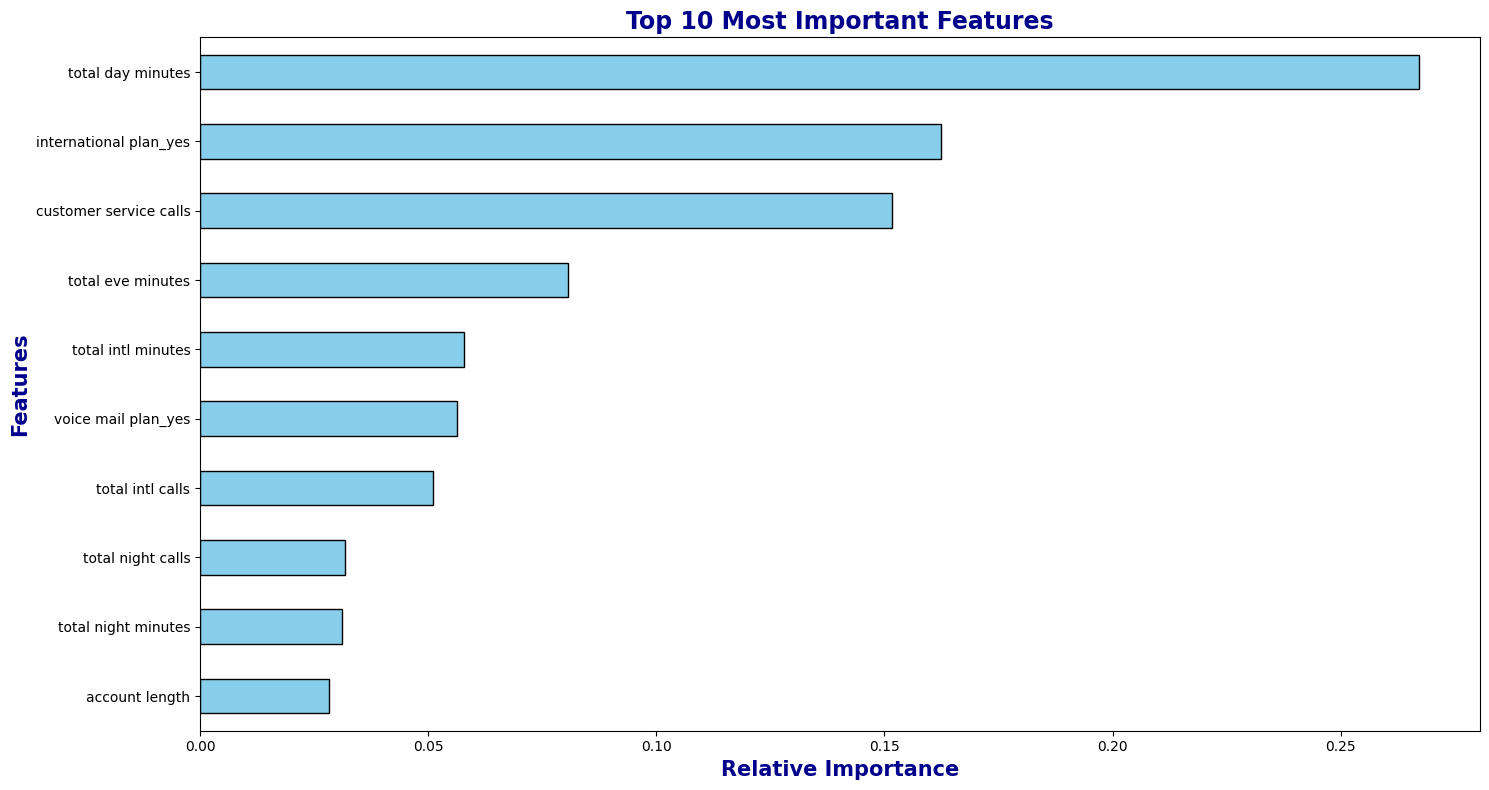

In [43]:
#create a dataFrame from the training set with original feature names
X_train_sm_df = pd.DataFrame(X_train_sm, columns=X_train.columns)

#get feature importances from the trained Decision Tree
importance = tree.feature_importances_

#match with feature names
feature_names = X_train_sm_df.columns

#create a series for easy sorting and plotting
feature_importances = pd.Series(importance, index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot top 10 important features
plt.figure(figsize=(15,8))
top_features = feature_importances.head(10)
top_features.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Relative Importance', fontsize=15, color='darkblue', fontweight='bold')
plt.ylabel('Features', fontsize=15, color='darkblue', fontweight='bold')
plt.title('Top 10 Most Important Features', fontsize=17, color='darkblue', fontweight='bold')
plt.tight_layout()
plt.show();


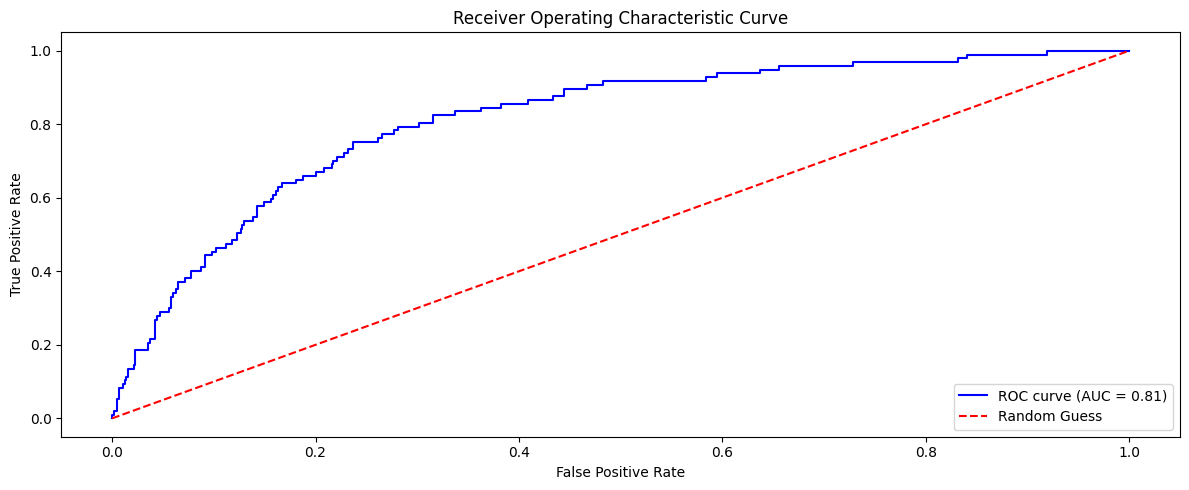

In [44]:
#predict probabilities for the positive class
y_pred1_proba = lr.predict_proba(X_test_s)[:,1]

#compute ROC curve
fpr, tpr, threshold = roc_curve(y_test, y_pred1_proba)

#compute AUC score
auc_score = roc_auc_score(y_test, y_pred1_proba)

#plot
plt.figure(figsize=(12,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--', label='Random Guess')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show();

**Observation**:  
The Decision Tree model achieved 85% accuracy on the test set. It identifies most non-churners correctly and captures 68% of actual churners but not good as our logistic regression model. While its precision for churners is moderate (49%), the overall performance indicates a reasonable balance between detecting churners and avoiding false positives.

### Random Forest Classifier

In [45]:
#instantiate RandomForestClassifier
rf = RandomForestClassifier()
#fit on the training data
rf.fit(X_train_sm, y_train_sm) 


RandomForestClassifier()

In [47]:
#generate predictions
y_pred2 = rf.predict(X_test_s)

#calculate accuracy on test data
print(f" The model  score on test data is {accuracy_score(y_test, y_pred2)*100:.2f}%")

 The model  score on test data is 90.10%


In [48]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       570
           1       0.65      0.68      0.67        97

    accuracy                           0.90       667
   macro avg       0.80      0.81      0.80       667
weighted avg       0.90      0.90      0.90       667



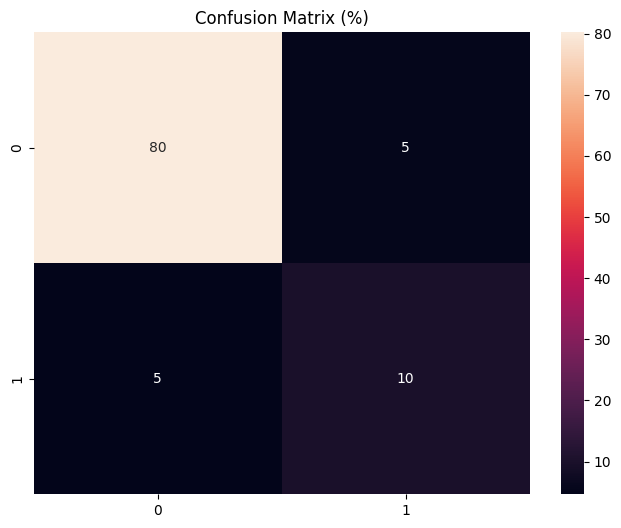

In [49]:
#comute confusion matrix
conf = confusion_matrix(y_test, y_pred2)

#normalize to show percentages
conf_percent = conf / conf.sum()*100

#plot heatamap
plt.figure(figsize=(8,6))
sns.heatmap(conf_percent, annot=True, fmt=".0f")
plt.title("Confusion Matrix (%)")
plt.show();

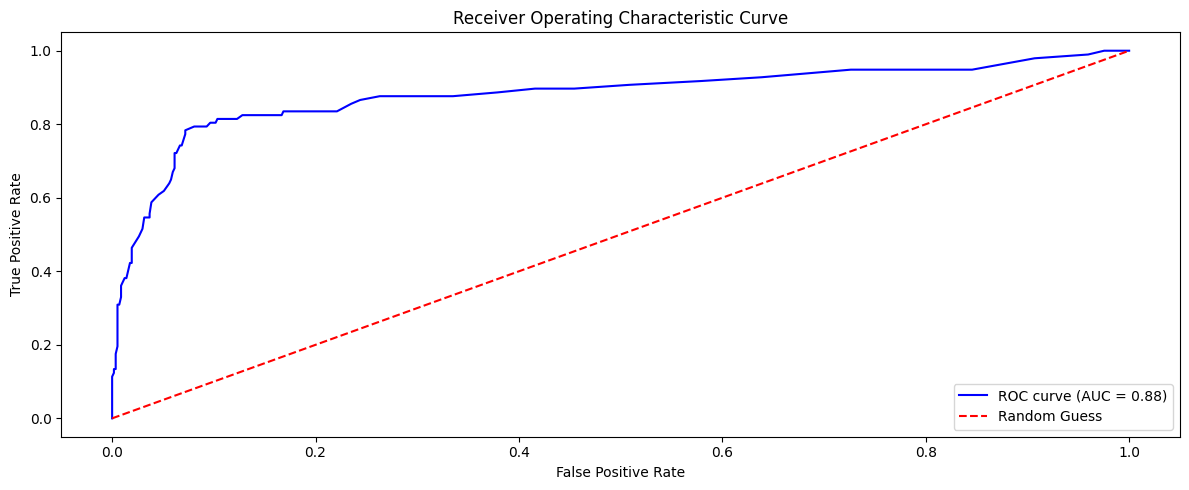

In [51]:
#predict probabilities for the positive class
y_pred2_proba = rf.predict_proba(X_test_s)[:,1]

#compute ROC curve
fpr, tpr, threshold = roc_curve(y_test, y_pred2_proba)

#compute AUC score
auc_score = roc_auc_score(y_test, y_pred2_proba)

#plot
plt.figure(figsize=(12,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--', label='Random Guess')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show();

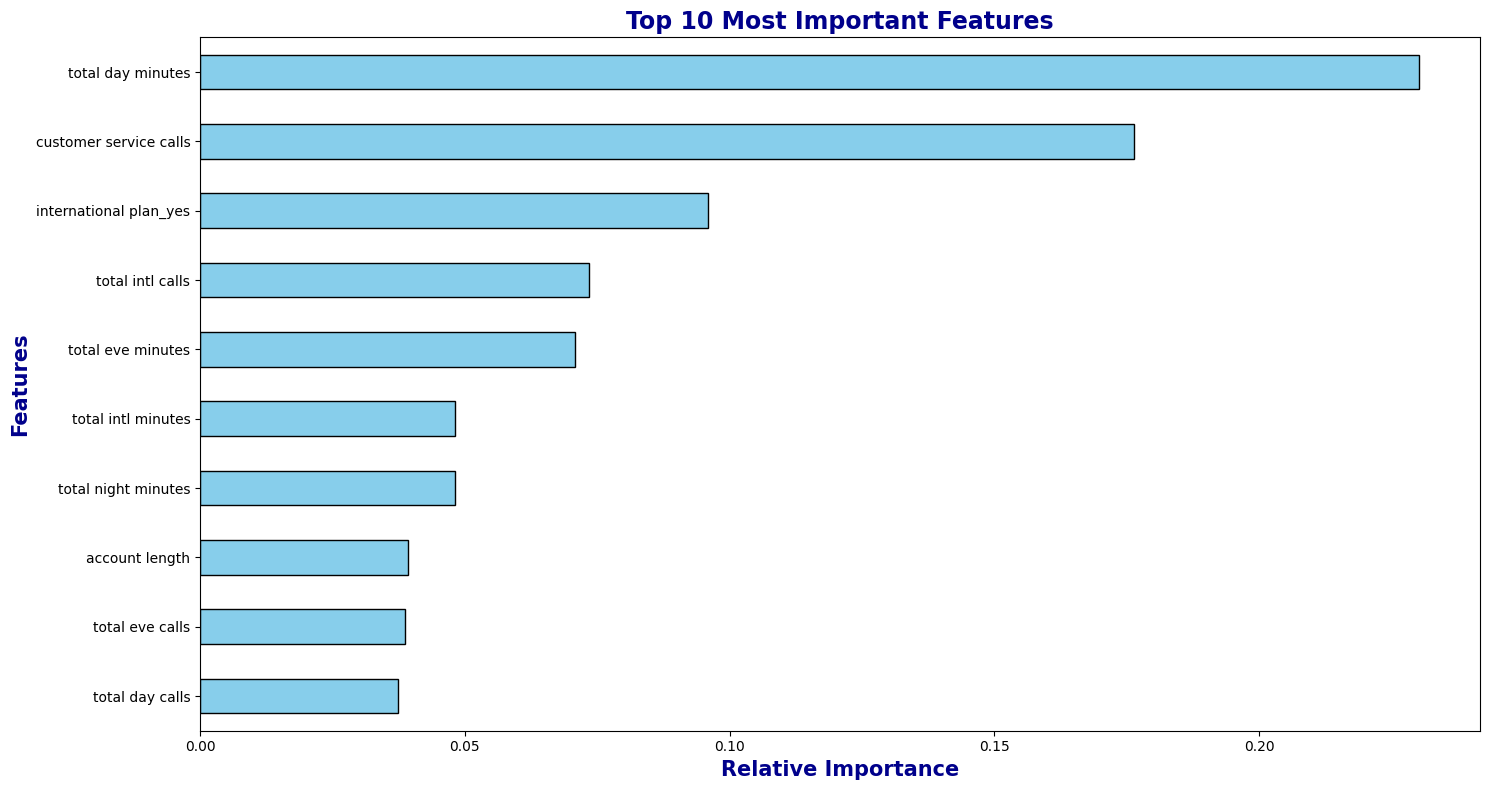

In [50]:
#create a dataFrame from the training set with original feature names
X_train_sm_df = pd.DataFrame(X_train_sm, columns=X_train.columns)

#get feature importances from the trained Decision Tree
importance = rf.feature_importances_

#match with feature names
feature_names = X_train_sm_df.columns

#create a series for easy sorting and plotting
feature_importances = pd.Series(importance, index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot top 10 important features
plt.figure(figsize=(15,8))
top_features = feature_importances.head(10)
top_features.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Relative Importance', fontsize=15, color='darkblue', fontweight='bold')
plt.ylabel('Features', fontsize=15, color='darkblue', fontweight='bold')
plt.title('Top 10 Most Important Features', fontsize=17, color='darkblue', fontweight='bold')
plt.tight_layout()
plt.show();


**Observation**:  


### XGBoost

In [52]:
#instantiate XGBoostClassifier
xg = XGBClassifier()
#fit on the training data
xg.fit(X_train_sm, y_train_sm) 


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [54]:
#generate predictions
y_pred3 = xg.predict(X_test_s)

#calculate accuracy on test data
print(f"The model  score on test data is {accuracy_score(y_test, y_pred3)*100:.2f}%")

The model  score on test data is 93.55%


In [55]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       570
           1       0.79      0.75      0.77        97

    accuracy                           0.94       667
   macro avg       0.88      0.86      0.87       667
weighted avg       0.93      0.94      0.93       667



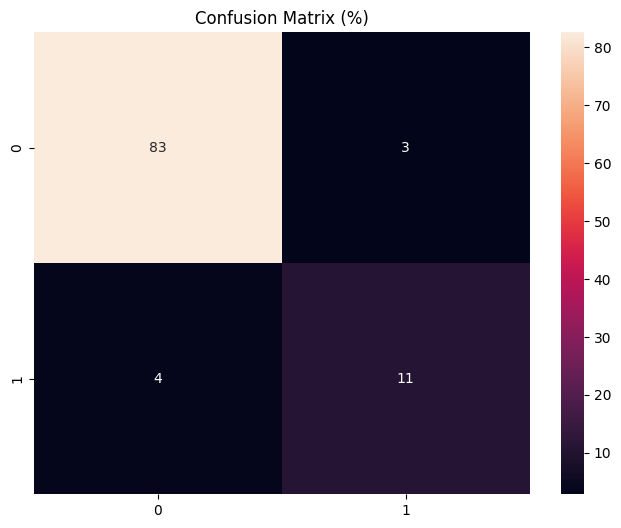

In [56]:
#comute confusion matrix
conf = confusion_matrix(y_test, y_pred3)

#normalize to show percentages
conf_percent = conf / conf.sum()*100

#plot heatamap
plt.figure(figsize=(8,6))
sns.heatmap(conf_percent, annot=True, fmt=".0f")
plt.title("Confusion Matrix (%)")
plt.show();

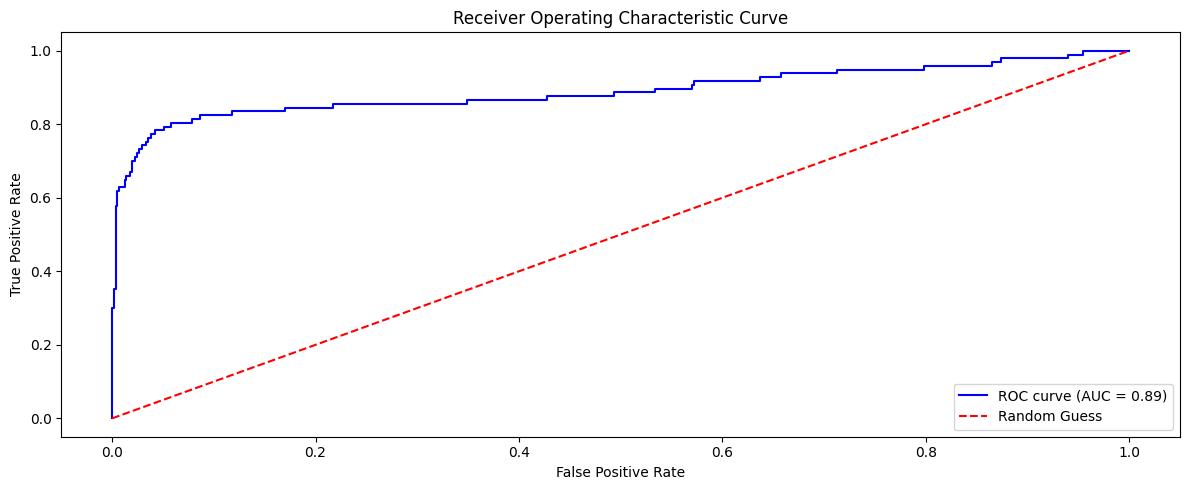

In [57]:
#predict probabilities for the positive class
y_pred3_proba = xg.predict_proba(X_test_s)[:,1]

#compute ROC curve
fpr, tpr, threshold = roc_curve(y_test, y_pred3_proba)

#compute AUC score
auc_score = roc_auc_score(y_test, y_pred3_proba)

#plot
plt.figure(figsize=(12,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--', label='Random Guess')  # baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show();

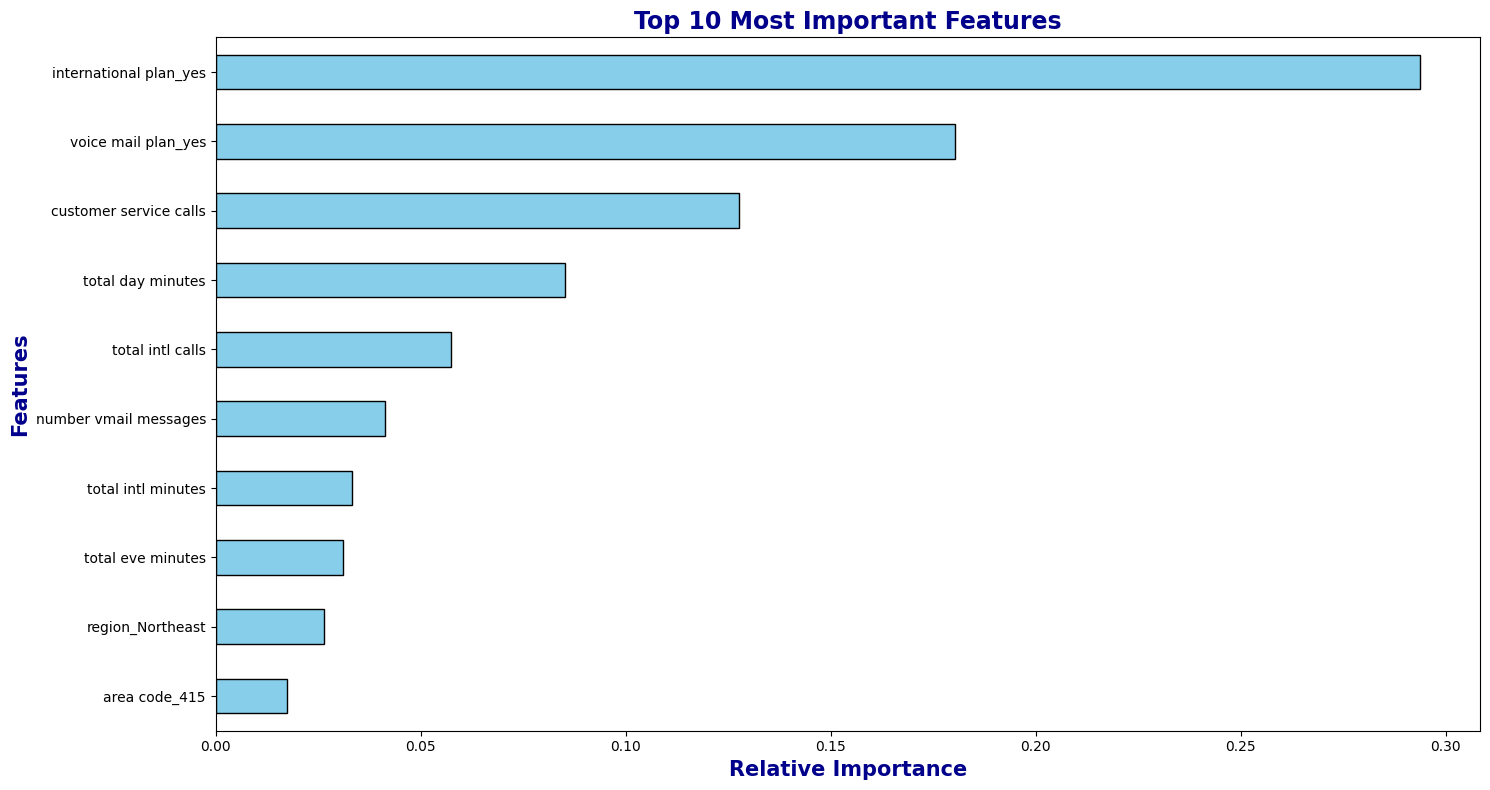

In [58]:
#create a dataFrame from the training set with original feature names
X_train_sm_df = pd.DataFrame(X_train_sm, columns=X_train.columns)

#get feature importances from the trained Decision Tree
importance = xg.feature_importances_

#match with feature names
feature_names = X_train_sm_df.columns

#create a series for easy sorting and plotting
feature_importances = pd.Series(importance, index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot top 10 important features
plt.figure(figsize=(15,8))
top_features = feature_importances.head(10)
top_features.sort_values().plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Relative Importance', fontsize=15, color='darkblue', fontweight='bold')
plt.ylabel('Features', fontsize=15, color='darkblue', fontweight='bold')
plt.title('Top 10 Most Important Features', fontsize=17, color='darkblue', fontweight='bold')
plt.tight_layout()
plt.show();


**Observation**: 


### Hyperparameter Tuning

In [102]:
#GridSearchCV
param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": [3, 5, 7, 8, None],
              "min_samples_split":[2, 5, 8, 10]
              }

#Instantiate gridsearch
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train_sm, y_train_sm)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 8, None],
                         'min_samples_split': [2, 5, 8, 10]},
             scoring='recall')

In [97]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}

In [104]:
#Recreate the tree model with the best params
tree1 = DecisionTreeClassifier(criterion="entropy", max_depth=None, min_samples_split=2)

#Train the model
tree1.fit(X_train_sm, y_train_sm)

#Check score
tree1.score(X_train_sm, y_train_sm)

1.0

In [105]:
#Predict
y_pred = tree1.predict(X_test_s)

#Check accuracy
acc1 = print(f" The model accuracy is {accuracy_score(y_test, y_pred)*100:.2f}%")
acc1

 The model accuracy is 86.60%


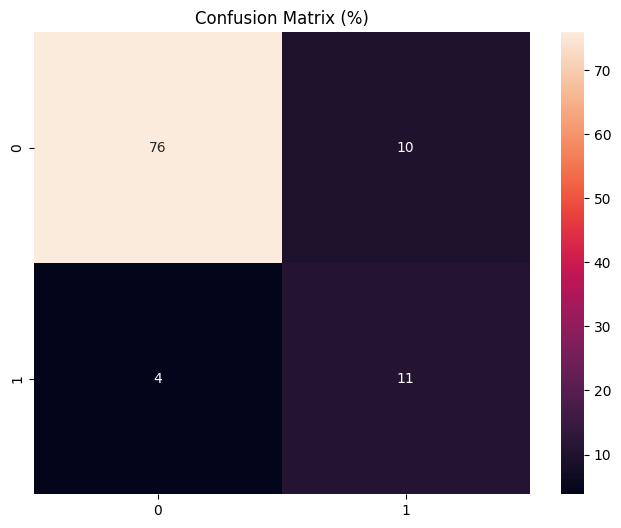

In [106]:
#comute confusion matrix
conf = confusion_matrix(y_test, y_pred)

#normalize to show percentages
conf_percent = conf / conf.sum()*100

#plot heatamap
plt.figure(figsize=(8,6))
sns.heatmap(conf_percent, annot=True, fmt=".0f")
plt.title("Confusion Matrix (%)")
plt.show();

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92       855
           1       0.53      0.74      0.61       145

    accuracy                           0.87      1000
   macro avg       0.74      0.81      0.77      1000
weighted avg       0.89      0.87      0.87      1000



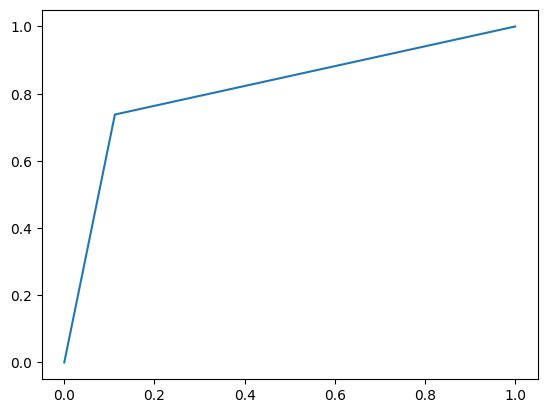

In [108]:
y_pred_proba = tree1.predict_proba(X_test_s)[:,1]

fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

plt.plot(fpr, tpr);

In [110]:
#Create param distribution
param_dist_xgb ={"max_depth": randint(1, 10),
                 "n_estimators": randint(2, 20)
              }

#Instantiate the random search
random_search = RandomizedSearchCV(estimator=boost, param_distributions=param_dist_xgb, \
                                   n_iter=10, cv=5, scoring="recall", random_state=42)
random_search.fit(X_train_sm, y_train_sm)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002517B013410>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002517B011D60>},
                   random_state=42, scoring='recall')

In [117]:
#Check best params
random_search.best_params_

{'max_depth': 7, 'n_estimators': 16}

In [118]:
#Instantiate the model 
boost2 = XGBClassifier(max_depth=7, min_samples_split=16)

#Train the model
boost2.fit(X_train_s, y_train_sm)

#Check score
boost2.score(X_train_s, y_train_sm)

1.0